<a href="https://colab.research.google.com/github/vmjs1234/DECISION_TREE_AND_ENSEMBLE/blob/main/4)_decision_tree_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree


## Define the Decision Tree Class

In [17]:
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs):
        node = self.tree
        while not node.is_leaf_node():
            if inputs[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def _grow_tree(self, X, y, depth=0):
     num_samples, num_features = X.shape
     num_labels = len(np.unique(y))

     if (depth >= self.max_depth or num_labels == 1 or
             num_samples < self.min_samples_split):
         leaf_value = self._most_common_label(y)
         return Node(value=leaf_value)

     feat_idxs = np.random.choice(num_features, num_features, replace=True)

     best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
    # If no valid split is found, return a leaf node
     if best_feat is None or best_thresh is None:
         leaf_value = self._most_common_label(y)
         return Node(value=leaf_value)

     left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
     left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
     right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
     return Node(best_feat, best_thresh, left, right)



    def _best_criteria(self, X, y, feat_idxs):
     best_gain = -1
     split_idx, split_thresh = None, None
     for feat_idx in feat_idxs:
         X_column = X[:, feat_idx]
         thresholds = np.unique(X_column)
         for threshold in thresholds:
             gain = self._information_gain(y, X_column, threshold)
             if gain > best_gain:
                 best_gain = gain
                 split_idx = feat_idx
                 split_thresh = threshold
    # Ensure that a valid split was found
     if split_idx is None or split_thresh is None:
         return None, None
     return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        num_samples = len(y)
        num_left, num_right = len(left_idxs), len(right_idxs)
        e_left, e_right = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (num_left / num_samples) * e_left + (num_right / num_samples) * e_right

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        if len(y) == 0:
         return None  # or handle appropriately

        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


 ## Load Data and Train the Model

In [18]:
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 1.000


##  Visualize the Decision Tree

Accuracy: 1.000


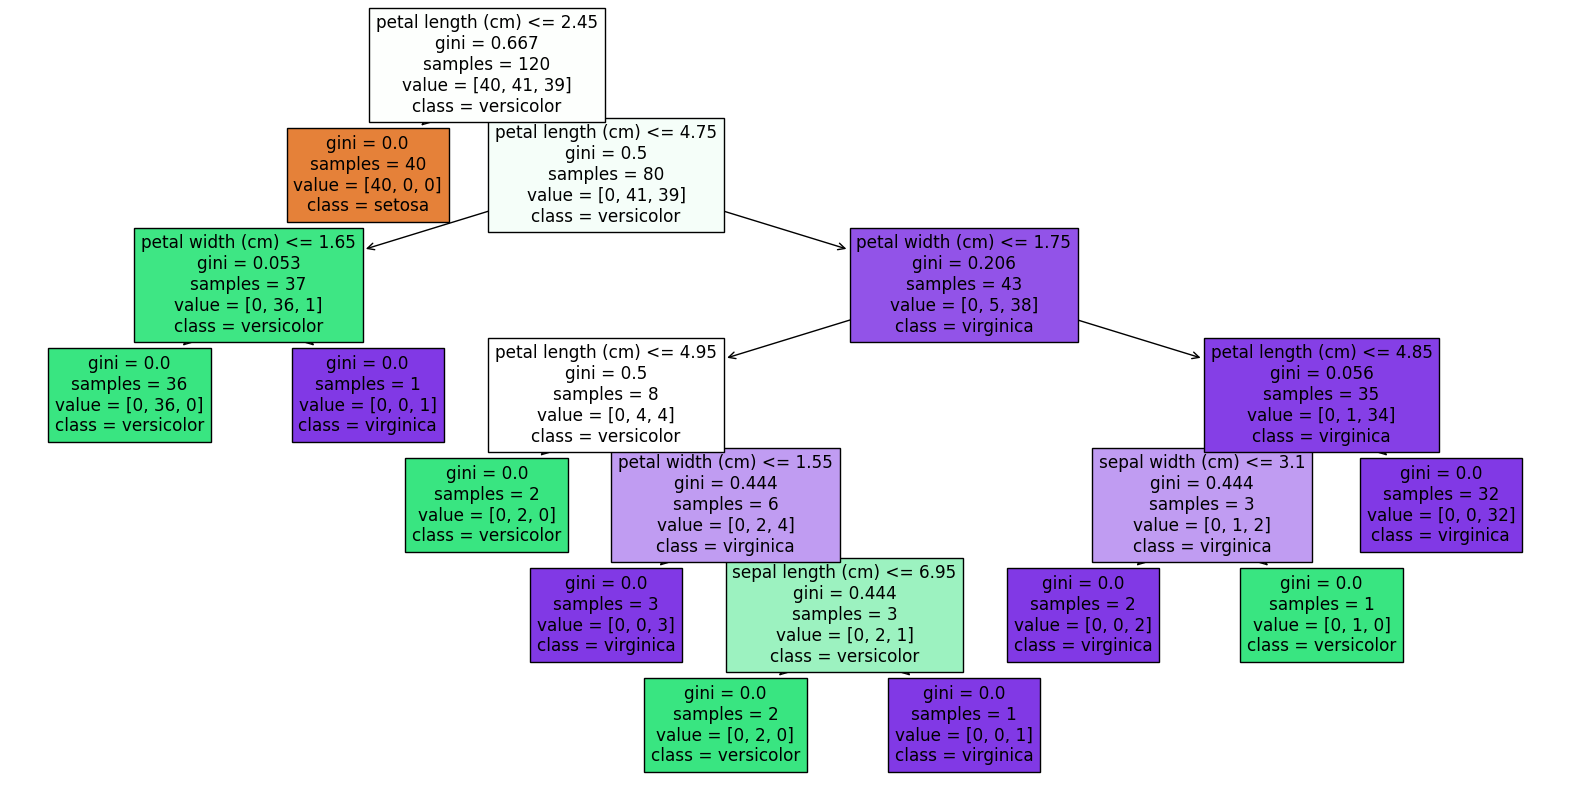

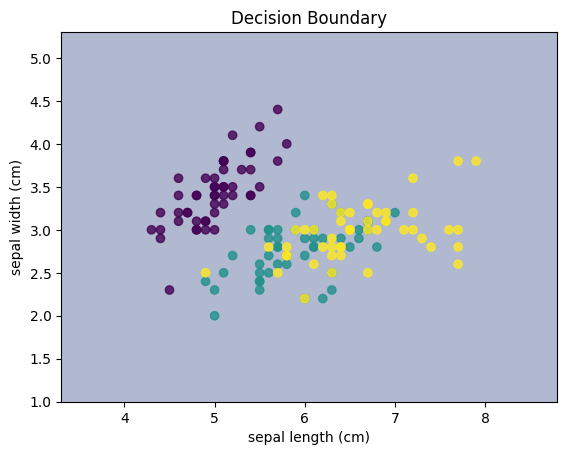

In [22]:


import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
# ## Define the Decision Tree Class
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs):
        node = self.tree
        while not node.is_leaf_node():
            if inputs[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def _grow_tree(self, X, y, depth=0):
     num_samples, num_features = X.shape
     num_labels = len(np.unique(y))

     if (depth >= self.max_depth or num_labels == 1 or
             num_samples < self.min_samples_split):
         leaf_value = self._most_common_label(y)
         return Node(value=leaf_value)

     feat_idxs = np.random.choice(num_features, num_features, replace=True)

     best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
    # If no valid split is found, return a leaf node
     if best_feat is None or best_thresh is None:
         leaf_value = self._most_common_label(y)
         return Node(value=leaf_value)

     left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
     left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
     right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
     return Node(best_feat, best_thresh, left, right)



    def _best_criteria(self, X, y, feat_idxs):
     best_gain = -1
     split_idx, split_thresh = None, None
     for feat_idx in feat_idxs:
         X_column = X[:, feat_idx]
         thresholds = np.unique(X_column)
         for threshold in thresholds:
             gain = self._information_gain(y, X_column, threshold)
             if gain > best_gain:
                 best_gain = gain
                 split_idx = feat_idx
                 split_thresh = threshold
    # Ensure that a valid split was found
     if split_idx is None or split_thresh is None:
         return None, None
     return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        num_samples = len(y)
        num_left, num_right = len(left_idxs), len(right_idxs)
        e_left, e_right = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (num_left / num_samples) * e_left + (num_right / num_samples) * e_right

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        if len(y) == 0:
         return None  # or handle appropriately

        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

#  ## Load Data and Train the Model
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# ##  Visualize the Decision Tree
# Train a DecisionTreeClassifier for visualization purposes
clf_visual = tree.DecisionTreeClassifier(max_depth=10)
clf_visual.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf_visual, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

#For visualizing the decision boundary you can use the following code:
#This code is just for illustration, you can adapt it to your specific needs
#It works best for 2 features

# Assuming you want to visualize the decision boundary for the first two features
X_vis = X[:, :2]  # Use only the first two features for visualization

# Create a meshgrid for plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel(),np.zeros(xx.ravel().shape[0]),np.zeros(xx.ravel().shape[0])])
Z = Z.reshape(xx.shape)


# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, alpha=0.8)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Decision Boundary")
plt.show()